Example: using Pandas to explore Kepler data
------------

The Kepler probe observed a patch of sky for four years looking for transit signals, evidence of planets slightly dimming these stars by passing between us and the star on their orbit.

The following example fetches the KOI (Kepler Object of Interest) table. Each row is a star that showed periodic dimming consistent with a planet in orbit around the star. However, we expect that there are a lot of false positives, so not every row corresponds to a real planet.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
koi = pd.read_csv('http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative')
#koi = pd.read_excel('planets.xls')

In [3]:
koi.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,koi_kepmag_err
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9563.000000,0.0
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,14.264606,NaN
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,...,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,1.385448,NaN
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,...,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,6.966000,NaN
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,13.440000,NaN
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,14.520000,NaN
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,174.000000,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,15.322000,NaN
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,676.000000,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,20.003000,NaN


In [4]:
koi.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


In [5]:
koi.iloc[0]

kepid                       10797460
kepoi_name                 K00752.01
kepler_name             Kepler-227 b
koi_disposition            CONFIRMED
koi_pdisposition           CANDIDATE
koi_score                          1
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   9.48804
koi_period_err1            2.775e-05
koi_period_err2           -2.775e-05
koi_time0bk                  170.539
koi_time0bk_err1             0.00216
koi_time0bk_err2            -0.00216
koi_impact                     0.146
koi_impact_err1                0.318
koi_impact_err2               -0.146
koi_duration                  2.9575
koi_duration_err1             0.0819
koi_duration_err2            -0.0819
koi_depth                      615.8
koi_depth_err1                  19.5
koi_depth_err2                 -19.5
koi_prad                        2.26
koi_prad_err1                   0.26
k

In [6]:
koi["kepid"]

0       10797460
1       10797460
2       10811496
3       10848459
4       10854555
          ...   
9559    10090151
9560    10128825
9561    10147276
9562    10155286
9563    10156110
Name: kepid, Length: 9564, dtype: int64

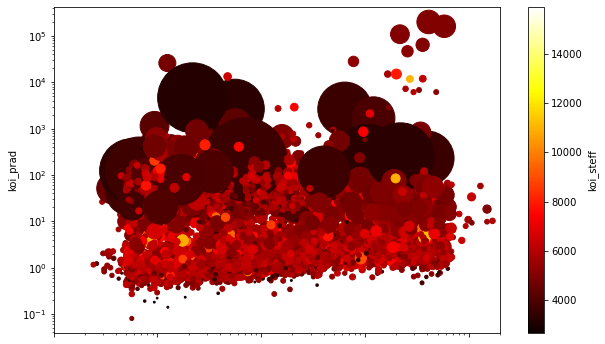

In [7]:
ax = koi.plot(x='koi_period', y='koi_prad', c='koi_steff', s=koi['koi_srad']*30, colormap=plt.cm.hot, kind='scatter', 
              figsize=(10,6), xlim=(0.1,2000), loglog=True)

In [9]:
koi['koi_steff'].describe()

count     9201.000000
mean      5706.823280
std        796.857947
min       2661.000000
25%       5310.000000
50%       5767.000000
75%       6112.000000
max      15896.000000
Name: koi_steff, dtype: float64

In [10]:
koi['koi_srad'].describe()

count    9201.000000
mean        1.728712
std         6.127185
min         0.109000
25%         0.829000
50%         1.000000
75%         1.345000
max       229.908000
Name: koi_srad, dtype: float64

In [11]:
koi.index = koi['kepid']

In [12]:
koi.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10797460,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10811496,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
10848459,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
10854555,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN


In [13]:
koi.iloc[42]

kepid                       11304958
kepoi_name                 K00764.01
kepler_name             Kepler-667 b
koi_disposition            CONFIRMED
koi_pdisposition           CANDIDATE
koi_score                      0.998
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   41.4396
koi_period_err1            7.557e-05
koi_period_err2           -7.557e-05
koi_time0bk                  208.932
koi_time0bk_err1             0.00142
koi_time0bk_err2            -0.00142
koi_impact                     0.355
koi_impact_err1                 0.04
koi_impact_err2               -0.355
koi_duration                 10.5989
koi_duration_err1              0.088
koi_duration_err2             -0.088
koi_depth                     2793.1
koi_depth_err1                  22.6
koi_depth_err2                 -22.6
koi_prad                         5.5
koi_prad_err1                   1.57
k

In [16]:
koi.loc[11304958]["koi_score"]

0.998

In [17]:
koi.kepler_name.isnull()

kepid
10797460    False
10797460    False
10811496     True
10848459     True
10854555    False
            ...  
10090151     True
10128825     True
10147276     True
10155286     True
10156110     True
Name: kepler_name, Length: 9564, dtype: bool

In [18]:
output = koi[koi.kepler_name.isnull() == False]

In [19]:
output

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10797460,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10854555,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
10872983,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350067,7350067,K06863.01,Kepler-1646 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,5.097,0.055,-0.050,0.193,0.034,-0.025,19h10m06.34s,+42d54m46.4s,15.737,NaN
9730163,9730163,K02704.03,Kepler-445 d,CONFIRMED,CANDIDATE,NaN,0,0,0,0,...,5.113,0.140,-0.140,0.189,0.125,-0.054,19h54m56.67s,+46d29m55.1s,17.475,NaN
8311864,8311864,K07016.01,Kepler-452 b,CONFIRMED,CANDIDATE,0.771,0,0,0,0,...,4.580,0.034,-0.127,0.798,0.150,-0.075,19h44m00.89s,+44d16m39.2s,13.426,NaN


In [20]:
koi.query("kepler_name.isnull() == False")

TypeError: unhashable type: 'numpy.ndarray'

In [16]:
output.to_excel('planets.xls')